# Introduction to scikit-learn (sklean)

This notbook demonstrates some of the most useful functions of the sklean library

it covers:
    
0. an end-to-end sklearn workflow
1. getting the data ready
2. choose the right estimator/algorithm for our problems
3. Fit the model/ algorithm and use it to make prediction on our data
4. evaluating a model
5. Improve a model
6. Save and load a traind model
7. Putting it all together

In [1]:
what_were_covering= [
   '0.an end-to-end sklearn workflow',
    '1.getting the data ready',
    '2.choose the right estimator/algorithm for our problems',
    '3.Fit the model/ algorithm and use it to make prediction on our data',
    '4.evaluating a model',
    '5.Improve a model',
    '6.Save and load a traind model',
    '7.Putting it all together'
]
what_were_covering

['0.an end-to-end sklearn workflow',
 '1.getting the data ready',
 '2.choose the right estimator/algorithm for our problems',
 '3.Fit the model/ algorithm and use it to make prediction on our data',
 '4.evaluating a model',
 '5.Improve a model',
 '6.Save and load a traind model',
 '7.Putting it all together']

## 0. An end-to-end sklearn workflow

In [2]:
# standard imports:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# 1. Get data ready

heart_desease = pd.read_csv('data/heart-disease.csv')
heart_desease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (feature matrix)

X= heart_desease.drop('target',axis=1)

#  Create Y (Label matrix)
y = heart_desease['target']

In [5]:
# 2. Choose the right model and hyperparameters
#'RandomForestClassifier' isis a classification of Ml model
from sklearn.ensemble import RandomForestClassifier

# 'clf' is a short term of classifiering
clf = RandomForestClassifier()

#  keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
### Debugging warning

# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()

# if we do not run this code below we got a warning in clf.fit(x_train,y_train)
# clf.get_params()

## How to fix it?
# 1.  clf = RandomForestClassifier(n_estimators=100) : because the default is 10

# 2. before running clf = RandomForestClassifier() we import warning module:
  #import warnings
  # warnongs.filterwarnings('ignore')   #to reset we type 'default' instead of 'ignore'
  # clf = RandomForestClassifier()

## how to check scikitlearn version we use?
import sklearn
sklearn.show_versions()

## how to upgrade the sklearn we get rid of the warning?
# we can sse in window anaconda prompt by ("list") to show the versions we uses in our notbook
# 1. Google search conda package management 
# 2. type in window: conda update scikit-learn --> let it install the package
# 3. type in window: conda list scikit-learn
# 4. conda search scikit-learn
# 5. conda search scikit-learn --info
# if all dependenceas ore okey it allows us to install the package
#  what shoul we do?
# uninstall the packages that arre old(here: python,numpy)
# then, install the specific package we need

##to uninstall;
#  conda uninstall scikit-learn python
## to install:
#  conda install python= 3.6.9 scikit-learn=2.2.2 matplotlib numpy jupyther

# now we do not get any warning and debugging warning


System:
    python: 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\zahra\Documents\sample_project\env\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.25.2
        scipy: 1.11.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\zahra\Documents\sample_project\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 2
threading_layer: intel

       filepath: C:\Users\zahra\Documents\sample_project\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 4


In [7]:
# 3. Fit the model to the training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# it means 80% of the data use for training


In [8]:
clf.fit(X_train,y_train);

In [9]:
X_train
# we can make a prediction on arrays that looks like this. beacause that is what our model has learned
#  (np.arrray([0,2,3,4])) there fore this is not looklike the train set.
# we need x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,41,0,2,112,268,0,0,172,1,0.0,2,0,2
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2


In [10]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3


In [11]:
#  Make a prediction

# y_label = clf.predict(np.arrray([0,2,3,4]))

# it is not looklike a x-train arrays. therefore it gott an error

In [12]:
y_predict= clf.predict(X_test)
y_predict

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [13]:
# 4. Evaluate the model
clf.score(X_train, y_train)

# .score Returns the mean accuracy on the given test data and labels.

1.0

In [14]:
clf.score(X_test,y_test)

0.8852459016393442

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.95      0.88      0.91        42

    accuracy                           0.89        61
   macro avg       0.86      0.89      0.87        61
weighted avg       0.89      0.89      0.89        61



In [16]:
confusion_matrix(y_test,y_predict)

array([[17,  2],
       [ 5, 37]], dtype=int64)

In [17]:
accuracy_score(y_test,y_predict)

0.8852459016393442

In [18]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators..." )
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)* 100:.2f}%") 
    #.2f is a shortcut in python using format string syntax. it is similar to: round(some_number,2)
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 20 estimators...
Model accuracy on test set: 75.41%
 
Trying model with 30 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 40 estimators...
Model accuracy on test set: 88.52%
 
Trying model with 50 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 60 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 70 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 80 estimators...
Model accuracy on test set: 88.52%
 
Trying model with 90 estimators...
Model accuracy on test set: 86.89%
 


In [19]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open('random_forst_model_01.pkl','wb'))

# wb: writing binaries

In [20]:
loaded_model = pickle.load(open('random_forst_model_01.pkl','rb'))
loaded_model.score(X_test,y_test)
# "rb"" read binaries

0.8688524590163934

## 1. Getting data ready to be used with machine learning


tHREE MAIN THING WE HAVE TO DO:
        1. sPLIT THE DATA INTO A FEATURES AND labels (usually `x` and `y`)
        2. Filling/imputing or disregarding missing values
        3. Converting non-numerical values to numerical values(feature encoding)

In [21]:
heart_desease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# use feautur column to predict y
X = heart_desease.drop('target', axis= 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_desease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# split data into trainig and test sets

from sklearn.model_selection import train_test_split
X_train,y_train,X_test, y_test = train_test_split(X,y,test_size= 0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [26]:
X.shape , len(heart_desease) #len of whole data

((303, 13), 303)

In [27]:
len(X_train),len(y_train)

(242, 61)

In [28]:
X.shape[0]* 0.8  #training set len

242.4

### 1. Make sure all it is numerical

In [29]:
car_sales = pd.read_csv('data/car-sales-extended.csv')

In [30]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [31]:
len(car_sales)

1000

In [32]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [33]:
# we can pretend that Doors are categorical. because it just 3 different cases that fit to a numerical values
car_sales['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [34]:
# Split into X/y
X= car_sales.drop("Price",axis=1)
y = car_sales['Price']

# split into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, y_train.shape

((800, 4), (800,))

In [35]:
# Build ML model 
from sklearn.ensemble import RandomForestRegressor
# RandomForestRegressor can predict a number

model = RandomForestRegressor()
# model.fit(X_train,y_train)
# model.score(X_test,y_test)


In [36]:
# Turn the categories into numbers
# the cell above got an error, we have to change the objects columns to numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot,
                                 categorical_features)],
                               remainder= "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
transformed_X[5]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 4.2652e+04])

In [38]:
X.head()


,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [39]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [40]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [41]:
transformed_X.shape, y.shape

((1000, 13), (1000,))

In [42]:
# lets refit the model
np.random.seed(44)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2,random_state=44)

len(X_train),len(y_train)
X_train.shape, y_train.shape,type(X_train)
# model.fit(X_train,y_train)

((800, 13), (800,), numpy.ndarray)

In [43]:
# X_train = X_train[:len(y_train)]
# X_train.shape, y_train.shape


In [44]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
X_test.dtype,y_test.dtype,X_test.shape, y_test.shape


(dtype('float64'), dtype('int64'), (200, 13), (200,))

In [46]:
# y_test = y_test.arrays.reshape(-1)
model.score(X_test,y_test)


0.10987743757496693

### 1.2 What if there were missing value
1. Fill them with some value (imputation)
2. Remove the samples with missing data altogether


In [47]:
#  mport data:
car_sales_miss = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_miss.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [48]:
#  isna() is the blankt cells in our data. naN
# how many data is missed in our dataframe?
car_sales_miss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# create X/y
X = car_sales_miss.drop('Price',axis=1)
y = car_sales_miss['Price']

In [50]:
# lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot,
                                 categorical_features)],
                               remainder= "passthrough")
transformed_X = transformer.fit_transform(car_sales_miss)
transformed_X


<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [51]:
car_sales_miss

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [52]:
car_sales_miss['Doors'].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

### option 1: Fill missing data with pandas


In [53]:
# Fill the 'Make' column
car_sales_miss['Make'].fillna('missing',inplace= True)

# Fill the 'Colour' colum
car_sales_miss['Colour'].fillna('missing',inplace= True)

# Fill the 'Odometer' colum
car_sales_miss['Odometer (KM)'].fillna(car_sales_miss['Odometer (KM)'].mean() ,inplace= True)

# Fill the 'Doors' colum
car_sales_miss['Doors'].fillna(4 ,inplace= True)

In [54]:
# check out our dataFrame again
car_sales_miss.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [55]:
# Remove rows with missing Price value
car_sales_miss.dropna(inplace=True)

In [56]:
car_sales_miss.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [57]:
len(car_sales_miss)

950

In [58]:
X= car_sales_miss.drop('Price', axis= 1)
y= car_sales_miss['Price']

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot,
                                 categorical_features)],
                               remainder= "passthrough")
transformed_X = transformer.fit_transform(car_sales_miss)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### OPTION 2: Fill missing data values with sklearn


In [60]:
car_sale_missing= pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sale_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [61]:
car_sale_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [62]:
# Drop the rows with no labels
car_sale_missing.dropna(subset= ['Price'], inplace= True)
car_sale_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [63]:
# Split into X/y 
X= car_sale_missing.drop('Price', axis=1)
y= car_sale_missing['Price']

In [64]:
# Fill missing valuse with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#  fill categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value= 4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns 
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#  Creat an imputer( something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer',door_imputer,door_features),
    ('num_imputer', num_imputer,num_features)
])

# transform the data
filled_x = imputer.fit_transform(X)
filled_x


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [65]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns= ['Make','Colours','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colours,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [66]:
car_sales_filled.isna().sum()

Make             0
Colours          0
Doors            0
Odometer (KM)    0
dtype: int64

In [67]:
# lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colours','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot,
                                 categorical_features)],
                               remainder= "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [68]:
# Now we have got our data as numbers and filled (no missing values)
#  Let's fit the model

np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,
                                                y, 
                                                test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [69]:
len(car_sales_filled), len(car_sales)

(950, 1000)

### Note = The 50 less values in the transformed data is becaues we droped the rows (50 total) with missing values in the price column

## 2.choosing the right estimator / algorithm for your problem

Some things to note:

* Sklearn refers to ML models, Algorithms as stimators.
* Classification problem - predicting a category (heart deseas or not)
    * sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number ( selling Price of a car)
    
if you are working on a ML problem and looking to use sklearn and not sure what model you should use, 
refer to the sklearn ml map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem (reg prob is predicting a number)

Let's use the California Housing data
* where get you the data set: 
    google sklearn dataset
    https://scikit-learn.org/stable/datasets/real_world.html#california-housing-datase
    


In [70]:
# Get California dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [71]:
housing_df = pd.DataFrame(housing['data'],columns= housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
housing_df['Target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [74]:
housing_df= housing_df.drop('MedHouseVal',axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [75]:
#  Import algorithm/estimator
from sklearn.linear_model import Ridge

#  Setup random seed
np.random.seed(42)
#  Create the data with Split the data into X/y
X = housing_df.drop('Target',axis = 1)
y = housing_df['Target'] #Median house price in $100,000s

# Split the data into tran and test
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

#  Instantiate and fit the model (on a train set)
model = Ridge()
model.fit(X_train,y_train)


# Check the score of the model (on the test set)
model.score(X_test,y_test)


0.5758549611440126

What if `Ridge` did'nt work or the score didn't fit our needs?

well, we could also try different model..

In [76]:
#  Import algorithm/estimator
from sklearn import svm

#  Setup random seed
np.random.seed(42)
#  Create the data with Split the data into X/y
X = housing_df.drop('Target',axis = 1)
y = housing_df['Target'] #Median house price in $100,000s

# Split the data into tran and test
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

#  Instantiate and fit the model (on a train set)
model = svm.SVR()
model.fit(X_train,y_train)


# Check the score of the model (on the test set)
model.score(X_test,y_test)

-0.01648536010717372

In [77]:
#  Import algorithm/estimator
from sklearn.svm import SVR

#  Setup random seed
np.random.seed(42)
#  Create the data with Split the data into X/y
X = housing_df.drop('Target',axis = 1)
y = housing_df['Target'] #Median house price in $100,000s

# Split the data into tran and test
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

#  Instantiate and fit the model (on a train set)
 
model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train,y_train)


# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.15979791560973444

how about we try an ensemble model ( an ensemble is combination of smaller modls 
to try and make better prediction than just a single model)?

Sklearn's ensemble models can be found here:https://scikit-learn.org/stable/modules/ensemble.html


In [78]:
#  Import tha RandomForestRegressor model class from ensemble module
# (It is bassed on the Decision Tree algorithm)
from sklearn.ensemble import RandomForestRegressor

# setup the random seed
np.random.seed(42)

# create the data
X= housing_df.drop('Target',axis=1)
y = housing_df['Target']

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create RandomForest module
model = RandomForestRegressor()

model.fit(X_train,y_train)

# Check the score of the model from test set
model.score(X_test,y_test)

0.8059837014172988

# 2.2 Picking a machine learning model for a classification problem

Let's go to the map ... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [79]:
heart_desease = pd.read_csv('data/heart-disease.csv')
heart_desease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
# are we have more than 50 data?
len(heart_desease)

303

* Are you predicting category? yes, heart decease ore not heart desease is a category

* Do we have a labeled data?  yes

* Do we have less than 100k samples?  Yes

* we get the estimator ML algorithm : Linear SVC

## Consulting the map and it says to try LinearSVC

In [81]:
# Import the linear svc estimator class
from sklearn.svm import LinearSVC

# Setup randomseed
np.random.seed(42)

# make the data
X = heart_desease.drop('target',axis=1)
y = heart_desease['target']

# split the daata
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train,y_train)

# score the data
clf.score(X_test,y_test)


C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [82]:
heart_desease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

* if the result is not good--> continue the map
* is it a text data? no
* use KNeighboresClassifier (skip to do it here)
* not working? use SVC or Ensemble classifier


In [83]:
#  Import tha RandomForestclassifier model class from ensemble module
# (It is bassed on the Decision Tree algorithm)
from sklearn.ensemble import RandomForestClassifier

# setup the random seed
np.random.seed(42)

# Check the score of the model from test set
clf.score(X_test,y_test)
# create the data
X= heart_desease.drop('target',axis=1)
y =heart_desease['target']

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create RandomForest module
clf = RandomForestClassifier()

clf.fit(X_train,y_train)

# score the data
clf.score(X_test,y_test)


0.8524590163934426

tidbit:

    1. If you have structured data, use ensemble method
    2. If you have unstructured data, use deep learnng or transfer learning

In [84]:
#  Ex. of structured data:
heart_desease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3 Fit the model/algorithm and use it to make prediction on our data

### 3.1 Fitting the model to the data

Different names for:

* `X` = features, featurs variables, data
* `y` = lables, targets, target variables

In [85]:
#  Import tha RandomForestclassifier model class from ensemble module

from sklearn.ensemble import RandomForestClassifier

# setup the random seed
np.random.seed(42)

# Check the score of the model from test set
clf.score(X_test,y_test)
# create the data
X= heart_desease.drop('target',axis=1)
y =heart_desease['target']

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create RandomForest module
clf = RandomForestClassifier()

#  Fit the model to the data (training the ml model)
clf.fit(X_train,y_train)

# Evaluate tha Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test,y_test)


0.8524590163934426

In [86]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [87]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a ml model

2 ways to make predictions:

* 1. `predict()` 
* 2. `predict_proba()`

In [88]:
# Use a trained model to make a predictions

#clf.predict(np.array([1, 7, 8, 3, 4])) # This doesnt wok 

In [89]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [90]:
X_test.shape

(61, 13)

In [91]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [92]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [93]:
#  Compare predictions to truth labels to evaluate the model
y_pred = clf.predict(X_test)
np.mean(y_pred == y_test)

0.8524590163934426

In [94]:
clf.score(X_test,y_test)

0.8524590163934426

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8524590163934426

Make predictions with `predict_proba()`


In [96]:
#  predict_proba() returns probabilities of a classification label (classes here: heart desease or not)
clf.predict_proba(X_test[:5])
# first value is for class one which is 0  and the second one for 1.
# in target we have 2 classess 0,1. predict_probab can show the probability of accurence of each classes
#  for example first row show that he first X_test data can be in target 0.89 percent zero/not heart desease. and only 11 percent for having heart desease


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [97]:
# let's predict() on the same data
clf.predict(X_test[:5])
# predict() can only predict the result of target.

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [98]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [99]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X= housing_df.drop('Target',axis=1)
y= housing_df['Target']

# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()


model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [100]:
y_pred[:10]

array([0.49909  , 0.74815  , 4.9334564, 2.56978  , 2.3469   , 1.6729601,
       2.30151  , 1.66775  , 2.52649  , 4.8600979])

In [101]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [102]:
len(y_pred), len(y_test)

(4128, 4128)

In [103]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

0.32672061405038777

In [104]:
housing_df['Target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

## 4. Evaluating a ml model


3 in-built ways to evaluate scikit-learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameters
3. Problem-specific metric functions

read more: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating  a model with the `score` method


In [105]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create X/y
X = heart_desease.drop('target',axis=1)
y = heart_desease['target']

# split the data
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# create classifier model instance
clf = RandomForestClassifier(n_estimators=1500)

# fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1500)

In [106]:
#  The highest value for .score() is 1.0 and the lowest is 0.0
clf.score(X_train,y_train)

1.0

In [107]:
clf.score(X_test,y_test)

0.8688524590163934

Let's use the `score()` on our regression problem...

In [108]:
from sklearn.ensemble import RandomForestRegressor

# setup the random seed
np.random.seed(42)

# create the data
X= housing_df.drop('Target',axis=1)
y = housing_df['Target']

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create RandomForest module
model = RandomForestRegressor(n_estimators=2)

model.fit(X_train,y_train)


RandomForestRegressor(n_estimators=2)

In [109]:
#  The default score() evaluation metric is r-squered for regression algorithm
model.score(X_train,y_train)

0.9085341768021599

In [110]:
model.score(X_test,y_test)

0.7005688909806709

## 4.2 Evaluating a model using the `SCORING` parameter

In [111]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create X/y
X = heart_desease.drop('target',axis=1)
y = heart_desease['target']

# split the data
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

# fit classifier to training data
clf.fit(X_train,y_train);



In [112]:
clf.score(X_test,y_test)

0.8524590163934426

In [113]:
# it devides the data and test over them. here cv=5. it return the score over each devided portion
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [114]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take mean of 5-fold cross validation (cv) score
clf_crose_val_score = np.mean(cross_val_score(clf,X,y))

# Compare the two
clf_single_score ,clf_crose_val_score

(0.8524590163934426, 0.8248087431693989)

In [115]:
# Default scoring parameter of classifier = mean accuracy
np.random.seed(42)
# clf.score()

In [116]:
# Scoring parameter set to non by default
np.random.seed(42)
cross_val_score(clf,X,y,cv=5,scoring= None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### 4.2.1 Classification model evaluation metrics


1. accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [117]:
heart_desease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_desease.drop('target', axis= 1)
y= heart_desease['target']

clf= RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y)

In [119]:
np.mean(cross_val_score)

0.8248087431693989

In [120]:
print(f'Heart desease classifier cross-validated Accuracy:{np.mean(cross_val_score) * 100 : .2f}%')

Heart desease classifier cross-validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve


ROC curves are comparison  of a model's true positive rate (tpr) versuss a models false positive rate (fpr).

* true positive = model predicts 1 when truth is 1
* false positive = model predicts 1 when truth is 0
* true negative = model predicts 0 when truth is 0
* false negative = model predicts 0 when truth is 1

In [121]:
np.random.seed(42)
# split the data
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
from sklearn.metrics import roc_curve

# Make prediction with probabilities
y_prob = clf.predict_proba(X_test)

y_prob[:10] ,len(y_prob)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]),
 61)

In [123]:
y_prob_positive = y_prob[:,1]
y_prob_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [124]:
# Calculate fpr,tpr, and tresholds
fpr,tpr,tresholds = roc_curve(y_test,y_prob_positive)

# check the fpr rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

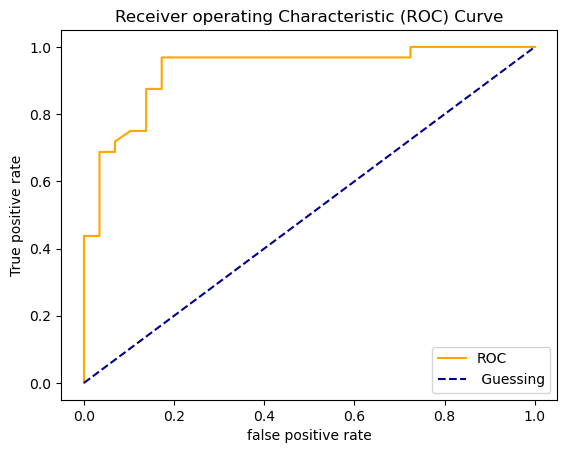

In [125]:
#   create function for plotting Roc curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    plot a Roc curve given the fpr
    and tpr of a model
    """
    # Plot roc curve
    plt.plot(fpr,tpr, color= 'orange',label= 'ROC')
    #Plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color= 'darkblue',linestyle= "--",label= " Guessing")
    
    # Customise the plot
    plt.xlabel("false positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver operating Characteristic (ROC) Curve")
    
    plt.legend()
    plt.show()
 

plot_roc_curve(fpr,tpr)

In [126]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_prob_positive)

0.9304956896551724

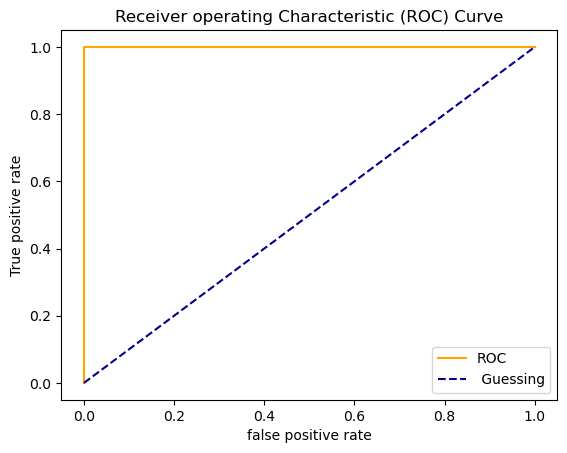

In [127]:
# Plot perfect ROC curve and AUC score
fpr,tpr,tresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [128]:
# Perfect AUC Score
roc_auc_score(y_test,y_test)

1.0

**Confusion matrix**

It is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

see more in here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [129]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [130]:
#  Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_pred,
           rownames=['Actual Labels'],
           colnames=['Predictive labels'])

Predictive labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [131]:
# 5 in table is fn, 4 is fp 
# 24 is true negative, 28 is true positive (Correct diagonal)
len(y_pred), 24 +5+4+28

(61, 61)

In [132]:
# How to install conda package from jupyter notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



In [135]:
# How to update conda  from jupyter notebook
# conda update -n base -c defaults conda

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Creating a confusion matrix using scikit-learn

To use the new method of creating a confusion matrix with scikitlearn you will need sklearn version 1.0

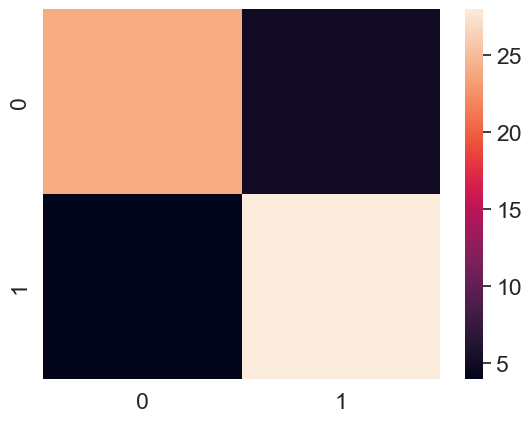

In [134]:
## Old Version not work

#  make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

# set the font scale
sns.set(font_scale= 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)

# plot it using seaborn
sns.heatmap(conf_mat);

In [136]:
# check the version of sklearn
import sklearn
sklearn.__version__

'1.3.0'

In [137]:
clf

RandomForestClassifier()

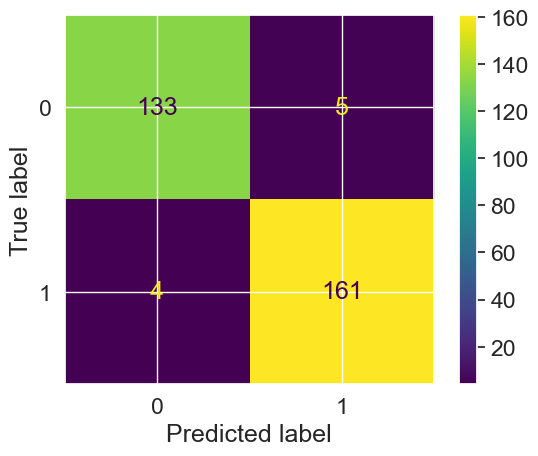

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

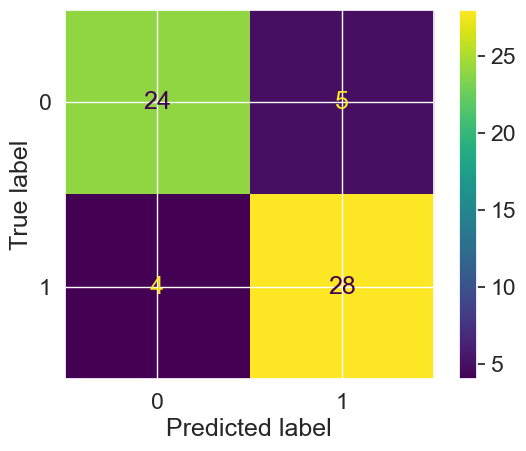

In [139]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred= y_pred);

### Classification Report 

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [142]:
# Try an example in case only one case has desease over the 10000 negative cases

# where perciesion recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_pred = np.zeros(10000) #Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_pred,
                                  output_dict= True))

C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Tp summerize classification metrics:

* **Acuracy** is a good measure to start with if all classes are balanced(e.g. same amount of samples whitch are labeled with 0 or 1)
* **Preciesion** and **Recall** become more important when the classess are imbalanced.
* if false positive predictions are worse than false negatives,aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of preciesion and recall.


to learn more: search model evaluation classification scikitlearn 
https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The one we are going to cover:

1. R^2 (R-squared) or coefficent of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [144]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= housing_df.drop("Target",axis=1)
y= housing_df['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [145]:
model.score(X_test,y_test)

0.8059837014172988

In [146]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [147]:
y_test.mean()

2.0550030959302323

In [148]:
from sklearn.metrics import r2_score

#  Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [149]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [151]:
r2_score(y_true= y_test,
        y_pred= y_test_mean)

0.0

In [152]:
r2_score(y_true= y_test,
        y_pred=y_test)

1.0

** Mean absolute error (MAE)**

MAE is the average of the absolute diffrences between prediction and actual values

It gives you an idea of how wrong your models predictions are.




In [154]:
#  MAE 
from sklearn.metrics import mean_absolute_error

y_pred= model.predict(X_test)
mae= mean_absolute_error(y_test,y_pred)
mae

0.32672061405038777

In [159]:
df = pd.DataFrame(data={'actual values': y_test,
                       'predicted values': y_pred})

# differences before absoluted
df['diffrences']= df["predicted values"] - df['actual values']
df.head(10)

,actual values,predicted values,diffrences
20046,0.47700,0.499090,0.022090
3024,0.45800,0.748150,0.290150
15663,5.00001,4.933456,-0.066554
20484,2.18600,2.569780,0.383780
9814,2.78000,2.346900,-0.433100
13311,1.58700,1.672960,0.085960
7113,1.98200,2.301510,0.319510
7668,1.57500,1.667750,0.092750
18246,3.40000,2.526490,-0.873510
5723,4.46600,4.860098,0.394098


In [160]:
df["diffrences"].mean()

0.011843612451549988

In [162]:
#  mae using formulas and diffrences

np.abs(df["diffrences"]).mean()

0.32672061405038777

**MSE**

MSE is the mean of the square of the errors between actual and predicted values.


In [163]:
from sklearn.metrics import mean_squared_error
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test,y_pred)
mse

0.2542406995878388

In [164]:
df['squareed_diffrences']=np.square(df["diffrences"])
df.head()

,actual values,predicted values,diffrences,squareed_diffrences
20046,0.47700,0.499090,0.022090,0.000488
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [165]:
# calculate mse by hand
squared = np.square(df["diffrences"])
squared.mean()

0.2542406995878388

In [168]:
df_large_error = df.copy()
df_large_error.iloc[0]["squareed_diffrences"] = 16
df_large_error.head()

,actual values,predicted values,diffrences,squareed_diffrences
20046,0.47700,0.499090,0.022090,16.000000
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [169]:
# calculate mse with large error
df_large_error["squareed_diffrences"].mean()

0.25811655037076037

In [171]:
df_large_error.iloc[1:100]["squareed_diffrences"] = 40
df_large_error["squareed_diffrences"].mean()

C:\Users\zahra\AppData\Local\Temp\ipykernel_5660\3226696487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_error.iloc[1:100]["squareed_diffrences"] = 40


0.25811655037076037

### 4.2.3 Finally using the `Scoring` parameter

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X= heart_desease.drop("target",axis=1)
y= heart_desease['target']

clf = RandomForestClassifier(n_estimators=100)


In [174]:
np.random.seed(42)

# cross-validation accuracy
# it split data to multiple train and test set ...

cv_acc= cross_val_score(clf,X,y,cv=5,scoring=None) 
# if scoring=None,estimator's default evaluation metric is used(which is accuracy for classification models)

cv_acc




array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [175]:
#  cross-val ac 
print(f"The Cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The Cross validated accuracy is: 82.48%


In [176]:
np.random.seed(42)


cv_acc= cross_val_score(clf,X,y,cv=5,scoring='accuracy')

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [177]:
#  cross-val ac 
np.random.seed(42)
print(f"The Cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The Cross validated accuracy is: 82.48%


In [178]:
# Preciesion 
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y, cv=5, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [180]:
print(f"The Cross validated accuracy is: {np.mean(cv_precision)*100:.2f}%")

The Cross validated accuracy is: 83.30%


In [181]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y, cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [182]:
print(f"The Cross validated accuracy is: {np.mean(cv_recall)*100:.2f}%")

The Cross validated accuracy is: 85.45%


Let's see the `scoring` parameter being used for a regression problem

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= housing_df.drop(['Target'],axis=1)
y= housing_df['Target']

model = RandomForestRegressor(n_estimators=100)




In [185]:
# r2
np.random.seed(42)

cv_r2 = cross_val_score(model,X,y,cv=3,scoring= None)
np.mean(cv_r2)

0.653726846238643

In [190]:
cv_r2

array([0.6202544 , 0.72010179, 0.62082435])

In [187]:
# MAE
np.random.seed(42)

cv_mse = cross_val_score(model,X,y,cv=3,scoring= 'neg_mean_squared_error')
np.mean(cv_mse)

-0.46249685943212987

In [191]:
cv_mse

array([-0.51194561, -0.33447337, -0.5410716 ])

In [189]:
# MSE
np.random.seed(42)

cv_mae = cross_val_score(model,X,y,cv=3,scoring= 'neg_mean_absolute_error')
np.mean(cv_mae)

-0.48385635699612406

In [192]:
cv_mae

array([-0.51830513, -0.42732746, -0.50593648])

## 4.3 Using different evaluation metrics as scikit-learn functions

The 3rd way to evaluate scikit-learn ml model/estimators is to using the `sklearn.metrics` module/
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# create x/y
X= heart_desease.drop('target',axis=1)
y =heart_desease['target']
# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create model
clf = RandomForestClassifier(n_estimators=100)


# fit the data
clf.fit(X_train,y_train)

# make prediction
y_pred=clf.predict(X_test)

#  Evaluate model using evaluation functions
print('Classifier metrics on the test set')
# print(f"Accuracy:{accuracy_score(y_test,clf.predict(X_test))*100:.2f}%"")
print(f"Accuracy:{accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_pred)}")
print(f"Recall score:{recall_score(y_test,y_pred)}")
print(f"F1_score:{f1_score(y_test,y_pred)}")

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
Recall score:0.875
F1_score:0.8615384615384615


In [200]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# create x/y
X= housing_df.drop('Target',axis=1)
y= housing_df['Target']

# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create model
model = RandomForestRegressor()


# fit the data
model.fit(X_train,y_train)

# make prediction
y_pred=model.predict(X_test)

#  Evaluate model using evaluation functions
print('Regression metrics on the test set')
print(f"R2:{r2_score(y_test,y_pred)}")
print(f"MAE:{mean_absolute_error(y_test,y_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_pred)}")


Regression metrics on the test set
R2:0.8031529355063766
MAE:0.32935222383720947
MSE:0.2618192081788877


## 5. Improving a model

First predictions = baseline predictions

First model = baseline model

from a data perspective:
    
    * Could  we collect more data? ( generally, the more data, the better)
    * Could we improve our data? 
    
    
From a model perspective:
    
    * Is there a better model we could use?
    * Could we improve the current model?

Hyperparameters vs. Parameters:
    
    * Parameters = model find these paterns in data
    * Hyperparameters = setting on a model you can adjust to (potentially) improve its to find pattern
    
    
Three ways to adjust hyperparameters:
1. by hand
2. randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [201]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier()

In [202]:
# how to get hyperparameters?
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Lets make 3 sets,training, and test.

In [203]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we are going to try and adjust:

* `max_depth`
* `max_features`
* `max_samples`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimator`


In [211]:
def evaluate_preds(y_true,y_preds):
    """
    Perform evaluation comparison on y_true labels vs. y_preds labels
    on a classification model.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                   'precision': round(precision,2),
                   'recall': round(recall,2),
                   'f1':round(f1,2)}
    print(f"Acc: {accuracy* 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f" recall: {recall:.2f}")
    print(f" f1: {f1:.2f}")
  
    return metric_dict      
    

In [212]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
heart_desease_shuffled = heart_desease.sample(frac=1)

# split data
X= heart_desease_shuffled.drop('target',axis=1)
y= heart_desease_shuffled['target']

# split data into train,validation and test
train_split = round(0.7 * len(heart_desease_shuffled)) #it means 70% of data
valid_split = round(train_split + 0.15 * len(heart_desease_shuffled))
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# make baseline predictions
y_pred = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_pred)
baseline_metrics

Acc: 82.22%
Precision: 0.81
 recall: 0.88
 f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [ ]:
np.random.seed(42)

# create a second classifier with differrent hyperparameters
clf2 = RandomForestClassifier(n_estimators=10)
clf2.fit(X_train,y_train)

# make baseline predictions
y_pred2 = clf2.predict(X_valid)

# Evaluate the secondclassifier on validation set
clf2_metrics = evaluate_preds(y_valid,y_pred2)
clf2_metrics

In [215]:
np.random.seed(42)

# create a second classifier with differrent hyperparameters
clf3 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf3.fit(X_train,y_train)

# make baseline predictions
y_pred3 = clf2.predict(X_valid)

# Evaluate the 3rd classifier on validation set
clf3_metrics = evaluate_preds(y_valid,y_pred3)
clf3_metrics

Acc: 82.22%
Precision: 0.84
 recall: 0.84
 f1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [210]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.2 Hyperparameter tuning with RandomizedSearchCV


In [222]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth": [None, 5,10,20,30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}

np.random.seed(42)

# Split into X/y
X= heart_desease_shuffled.drop('target',axis=1)
y= heart_desease_shuffled['target']

# Split into train,test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate randomforestclassifier
clf= RandomForestClassifier(n_jobs=-1) #The number of jobs to run in parallel.``-1`` means using all processors.

# Setup RandomizedsearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter= 10, #number of modelsto try
                            cv= 5,
                            verbose=2)

# fit the randomizedsearchcv version of clf
rs_clf.fit(X_train,y_train);



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=  10.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

In [223]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [224]:
#  Make prediction with thw bwst hyper parameter
rs_y_pred = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_pred)

Acc: 81.97%
Precision: 0.77
 recall: 0.86
 f1: 0.81


## 5.3 Hyper parameter tuning with GridSearchCV


In [226]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [228]:
# the total combination of the last tuning via grid by cv=5
6*5*2*3*3 *5

2700

In [229]:
# reduces our search space based on the best_params_ we got in the last section.
grid2= {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [231]:
# the new total combination would be:(by cv=5)
3*1*2*1*2 *5

60

In [233]:
from sklearn.model_selection import GridSearchCV,train_test_split


np.random.seed(42)

# Split into X/y
X= heart_desease_shuffled.drop('target',axis=1)
y= heart_desease_shuffled['target']

# Split into train,test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate randomforestclassifier
clf= RandomForestClassifier(n_jobs=1) #The number of jobs to run in parallel.``-1`` means using all processors.

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid2,
                      cv=5,
                      verbose=2)
                    

# fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\zahra\Documents\sample_project\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

In [234]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [236]:
gs_y_pred = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_pred)


Acc: 81.97%
Precision: 0.77
 recall: 0.86
 f1: 0.81


Let's compare our different model metrics


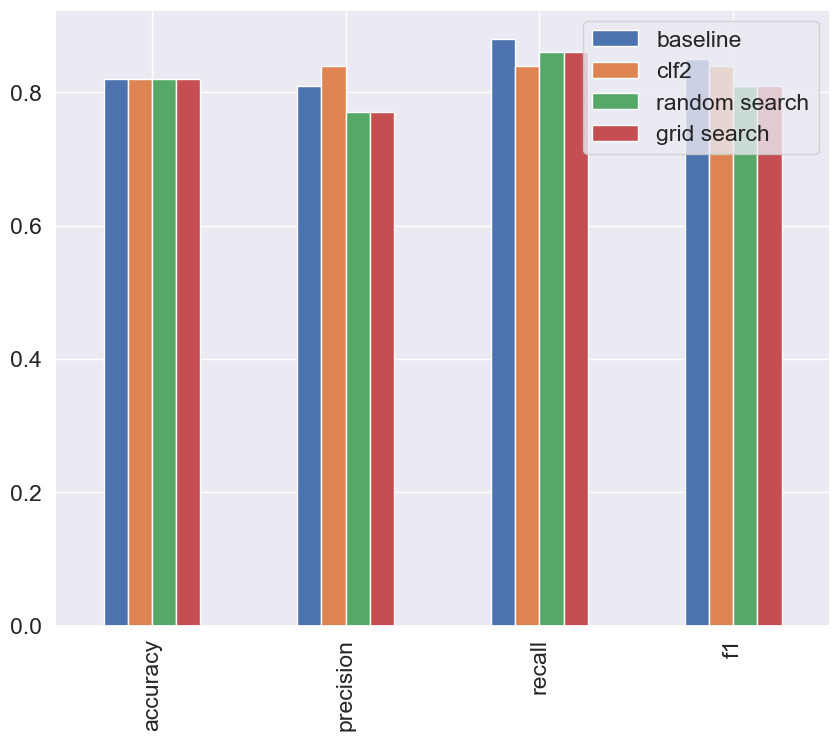

In [237]:
compare_metrics = pd.DataFrame({'baseline':baseline_metrics,
                                'clf2': clf2_metrics,
                                'random search': rs_metrics,
                                'grid search':gs_metrics})

compare_metrics.plot.bar(figsize= (10,8));

### 6. saving and loading trained ml models

Two ways to save and load ml models:

    1. With python a `pickle` module
    2. with the `joblib` module
    
** Pickle**


In [239]:
import pickle

# Save an existing model to file
# gs_clf is an object in python
#  wb= write binary
pickle.dump(gs_clf,open('gs_Randomforest_model1.pkl','wb'))

In [241]:
# load a saved model
# rb'= read binary

loaded_pickle_model = pickle.load(open('gs_Randomforest_model1.pkl','rb'))

In [242]:
from sklearn.model_selection import GridSearchCV,train_test_split


np.random.seed(42)

# Split into X/y
X= heart_desease_shuffled.drop('target',axis=1)
y= heart_desease_shuffled['target']

# Split into train,test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [244]:
# Make some predictions
pickle_y_pred = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_pred)

Acc: 81.97%
Precision: 0.77
 recall: 0.86
 f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

*** Joblib***

if the model is too larg it would be good to do in this way

In [245]:
from joblib import dump,load

# save model to file
dump(gs_clf,filename='gs_Randomforest_model1.joblib')

['gs_Randomforest_model1.joblib']

In [246]:
#  import and saved joblib model
loaded_job_model = load(filename='gs_Randomforest_model1.joblib')


In [247]:
# make and evaluation joblib predictions
joblib_y_pred = loaded_job_model.predict(X_test)
evaluate_preds(y_test,joblib_y_pred)

Acc: 81.97%
Precision: 0.77
 recall: 0.86
 f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

### 7. Putting it all together

In [250]:
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [252]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [253]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
* fill the missing data/
* convert the data to numbers
* build a ml model on it


In [265]:
#  Getting data ready

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# setup random seed
import numpy as np
np.random.seed(42)

#import data and drop the rows with missing labels
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'],inplace= True)

# Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps= [
    ('imputer',SimpleImputer(strategy= 'constant', fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps= [
    ('imputer',SimpleImputer(strategy='constant',fill_value= 4))])

numeric_feature = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values and convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat',categorical_transformer,categorical_features),
                        ('door',door_transformer,door_feature),
                        ('num',numeric_transformer,numeric_feature)
                    ])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor',preprocessor),
                       ('model',RandomForestRegressor())])

# Split data
X = data.drop('Price',axis= 1)
y = data['Price']


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

# Fit and score the model 
model.fit(X_train,y_train)

model.score(X_test,y_test)


0.22188417408787875

It's also possible to use `GridSearchCv` or `RandomizedSearchCV`with our `Pipeline`.

In [268]:
# Use GridSearchCV with our regression Pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy":['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features':[None],
    'model__min_samples_split':[2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=None, model__min_sampl

[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s
[CV] END model__max_depth=5, model__max_features=None, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [None],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [269]:
gs_model.score(X_test,y_test)

0.3339554263158365